In [82]:
%matplotlib inline
from datetime import datetime

from pandas_datareader.data import Options
import numpy as np
import pandas as pd

In [98]:
aapl = Options('snap', 'yahoo')

In [99]:
data = aapl.get_all_data()

In [100]:
df = data.reset_index()
#df['Expiry'] = df['Expiry'].dt.date
df['Expiry'] = df.Expiry.astype(np.int64)


In [101]:
df.head()

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
0,3.0,1547769600000000000,call,SNAP190118C00003000,12.63,11.00,13.80,0.00,0.000000,1.0,2.0,2.656253,SNAP,False,SNAP,13.14,2017-09-25 17:57:06,2017-09-12 17:05:51,"{'impliedVolatility': 2.6562533593750004, 'str..."
1,3.0,1547769600000000000,put,SNAP190118P00003000,0.10,0.07,0.15,-0.04,-28.571426,1.0,305.0,0.783205,SNAP,False,SNAP,13.14,2017-09-25 17:57:06,2017-09-22 16:20:29,"{'impliedVolatility': 0.7832052929687501, 'str..."
2,3.0,1579219200000000000,put,SNAP200117P00003000,0.21,0.17,0.39,0.00,0.000000,40.0,51.0,0.739260,SNAP,False,SNAP,13.14,2017-09-25 17:57:06,2017-09-21 15:50:28,"{'impliedVolatility': 0.7392604199218749, 'str..."
3,5.0,1508457600000000000,call,SNAP171020C00005000,8.50,8.15,9.05,0.85,11.111110,1.0,1.0,3.292971,SNAP,False,SNAP,13.14,2017-09-25 17:57:06,2017-08-04 16:59:44,"{'impliedVolatility': 3.2929705175781248, 'str..."
4,5.0,1508457600000000000,put,SNAP171020P00005000,0.02,0.00,0.03,0.00,0.000000,15.0,199.0,1.625002,SNAP,False,SNAP,13.14,2017-09-25 17:57:06,2017-08-15 17:16:01,"{'impliedVolatility': 1.625001875, 'strike': 5..."


In [105]:
put_df = df[df['Type'] == 'put']
put_df['value'] = df.Strike - (df.Last - df['Underlying_Price'])
call_df = df[df['Type'] == 'call']
call_df['value'] = (df.Last - df['Underlying_Price']) - df.Strike

/home/wroscoe/miniconda3/envs/works/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/wroscoe/miniconda3/envs/works/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [106]:
call_df

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON,value
0,3.0,1547769600000000000,call,SNAP190118C00003000,12.63,11.00,13.80,0.000000,0.000000,1.0,2.0,2.656253,SNAP,False,SNAP,13.14,2017-09-25 17:57:06,2017-09-12 17:05:51,"{'impliedVolatility': 2.6562533593750004, 'str...",-3.51
3,5.0,1508457600000000000,call,SNAP171020C00005000,8.50,8.15,9.05,0.850000,11.111110,1.0,1.0,3.292971,SNAP,False,SNAP,13.14,2017-09-25 17:57:06,2017-08-04 16:59:44,"{'impliedVolatility': 3.2929705175781248, 'str...",-9.64
5,5.0,1510876800000000000,call,SNAP171117C00005000,9.75,9.70,10.05,0.000000,0.000000,1.0,1.0,4.027349,SNAP,False,SNAP,13.14,2017-09-25 17:57:06,2017-08-26 03:51:08,"{'impliedVolatility': 4.027348715820313, 'stri...",-8.39
6,5.0,1516320000000000000,call,SNAP180119C00005000,8.65,8.60,8.75,-0.050000,-0.574715,5.0,85.0,1.632814,SNAP,False,SNAP,13.14,2017-09-25 17:57:06,2017-09-22 15:55:42,"{'impliedVolatility': 1.6328143359374998, 'str...",-9.49
9,5.0,1547769600000000000,call,SNAP190118C00005000,8.40,8.10,8.60,-0.400001,-4.545461,13.0,290.0,0.611332,SNAP,False,SNAP,13.14,2017-09-25 17:57:06,2017-09-25 14:45:13,"{'impliedVolatility': 0.6113320117187502, 'str...",-9.74
11,5.0,1579219200000000000,call,SNAP200117C00005000,8.75,8.15,9.30,-0.700000,-7.407405,49.0,2.0,0.626957,SNAP,False,SNAP,13.14,2017-09-25 17:57:06,2017-09-25 14:47:39,"{'impliedVolatility': 0.6269568554687501, 'str...",-9.39
13,6.0,1516320000000000000,call,SNAP180119C00006000,7.15,4.00,8.30,0.000000,0.000000,2.0,2.0,1.872071,SNAP,False,SNAP,13.14,2017-09-25 17:57:06,2017-08-11 21:11:40,"{'impliedVolatility': 1.8720709521484376, 'str...",-11.99
18,7.0,1516320000000000000,call,SNAP180119C00007000,8.25,7.25,7.55,0.000000,0.000000,5.0,10.0,1.650392,SNAP,False,SNAP,13.14,2017-09-25 17:57:06,2017-08-28 16:10:23,"{'impliedVolatility': 1.650392373046875, 'stri...",-11.89
21,8.0,1508457600000000000,call,SNAP171020C00008000,6.14,5.60,5.75,0.000000,0.000000,10.0,47.0,2.037114,SNAP,False,SNAP,13.14,2017-09-25 17:57:06,2017-09-20 15:35:08,"{'impliedVolatility': 2.037114282226563, 'stri...",-15.00
23,8.0,1510876800000000000,call,SNAP171117C00008000,6.65,7.15,7.50,0.000000,0.000000,12.0,8.0,2.820315,SNAP,False,SNAP,13.14,2017-09-25 17:57:06,2017-09-07 14:34:45,"{'impliedVolatility': 2.82031544921875, 'strik...",-14.49


/home/wroscoe/miniconda3/envs/works/lib/python3.5/site-packages/matplotlib/collections.py:877: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


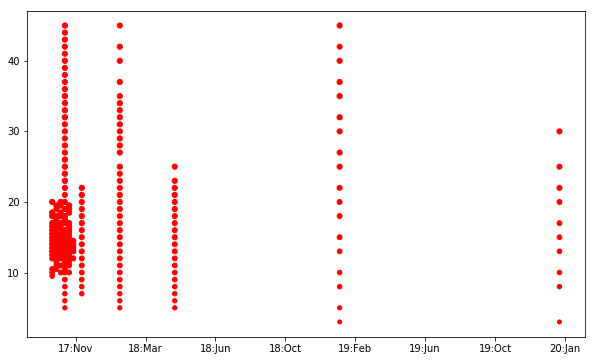

In [107]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=put_df.Expiry, y=put_df.Strike, s=put_df.value, c='red')
ax.scatter(x=call_df.Expiry, y=call_df.Strike, s=call_df.value, c='green')
ax.set_xticklabels([datetime.fromtimestamp(ts / 1e9).strftime('%y:%b') for ts in ax.get_xticks()])


In [60]:
from matplotlib import pyplot as plt

In [62]:

fig, ax = plt.subplots()

ax.scatter(put_df['Expiry'], put_df['Strike'])

ax.legend()
ax.grid(True)

plt.show()

TypeError: float() argument must be a string or a number, not 'datetime.date'

TypeError: float() argument must be a string or a number, not 'datetime.date'